## Build Convolutional Neural Network (CNN) based on Fashion-MNIST data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

import pandas as pd
import numpy as np
from numpy import load

from functools import partial

import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

Load in the Ali Express image dataset and labels

In [ ]:
ali_image_data = load("/content/drive/MyDrive/group_project/stored_data/raw_image_data.npy")
ali_image_labels = load("/content/drive/MyDrive/group_project/stored_data/raw_image_labels.npy")

Because the Ali Express labels are words, e.g. "dress" and "trouser," we need to convert them into numbers.

There are multiple categories being labeled with the number "10" because the fashion-MNIST dataset only has labels for 0 - 9

In [ ]:
transdict = {'tshirt' : 0, 'trouser' : 1,
 'pullover' : 2,  'dress' : 3,
 'coat' : 4,     'sandal' : 5,
 'shirt' : 6,  'sneaker' : 7,
 'bag' : 8,  'boot' : 9,
 'sunglasses' : 10, 'socks' : 10,
 'belt' : 10, 'hat' : 10,
 'shorts' : 10, 'polo' : 6,
 'underwear' : 10
}

ali_cleaned_labels = np.array([ transdict[item] for item in ali_image_labels])

Now we drop the training images that correspond with label = 10

In [ ]:
drop_index = np.where(ali_cleaned_labels==10)

ali_image_data = np.delete(ali_image_data, drop_index, axis=0)
ali_cleaned_labels = np.delete(ali_cleaned_labels, drop_index, axis=0)

Pull in the fashion-MNIST training and testing dataset, perform light preprocessing to prepare data for the CNN.

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

train_images = tf.image.resize(train_images, [64, 64])
test_images = tf.image.resize(test_images, [64, 64])

#train_images = np.squeeze(train_images)
#test_images = np.squeeze(test_images)

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
train_images = train_images / 255
test_images = test_images / 255

### Build the CNN model

This model comes directly from Hands-On Machine Learning notebooks: https://github.com/ageron/handson-ml2/blob/master/14_deep_computer_vision_with_cnns.ipynb

In [ ]:
DefaultConv2D = partial(tf.keras.layers.Conv2D, kernel_size=3, padding="same",
                        activation="relu", kernel_initializer="he_normal")

In [ ]:
model = tf.keras.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[64, 64, 1]),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=64, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=10, activation="softmax")
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, epochs=15,
                    validation_data=(test_images, test_labels))

Epoch 1/15
1875/1875 [==============================] - 45s 17ms/step - loss: 0.7474 - accuracy: 0.7380 - val_loss: 0.4147 - val_accuracy: 0.8597
Epoch 2/15
1875/1875 [==============================] - 33s 17ms/step - loss: 0.4289 - accuracy: 0.8542 - val_loss: 0.3173 - val_accuracy: 0.8881
Epoch 3/15
1875/1875 [==============================] - 33s 17ms/step - loss: 0.3641 - accuracy: 0.8787 - val_loss: 0.2895 - val_accuracy: 0.9023
Epoch 4/15
1875/1875 [==============================] - 32s 17ms/step - loss: 0.3216 - accuracy: 0.8932 - val_loss: 0.2775 - val_accuracy: 0.8997
Epoch 5/15
1875/1875 [==============================] - 33s 18ms/step - loss: 0.2980 - accuracy: 0.8995 - val_loss: 0.2548 - val_accuracy: 0.9090
Epoch 6/15
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2767 - accuracy: 0.9077 - val_loss: 0.2608 - val_accuracy: 0.9087
Epoch 7/15
1875/1875 [==============================] - 33s 18ms/step - loss: 0.2601 - accuracy: 0.9124 - val_loss: 0.2495 -

313/313 - 2s - loss: 0.2478 - accuracy: 0.9179 - 2s/epoch - 6ms/step


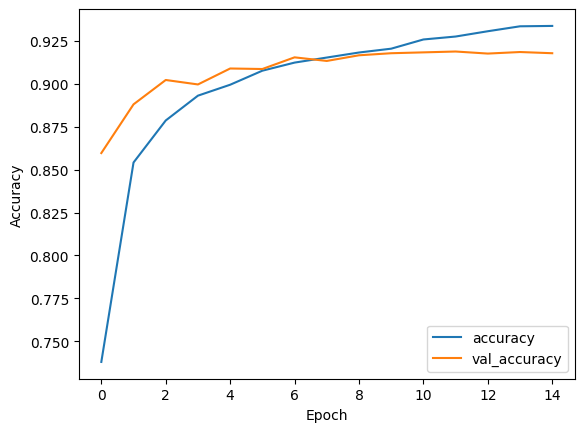

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
model.save('/content/drive/MyDrive/group_project/stored_data/cnn_mnist_model.h5')

## Make Predictions

#### Predictions on the raw image training set

The accuracy is only 15%, and the model thinks 62% of the data is a bag

In [ ]:
ali_train_preds = model.predict(np.expand_dims(ali_image_data, axis=-1))

1101/1101 [==============================] - 6s 5ms/step


In [ ]:
ali_train_pred_labels = np.array([np.argmax(i) for i in ali_train_preds])

In [ ]:
accuracy_score(ali_train_pred_labels, ali_cleaned_labels)

0.15078959327425584

In [ ]:
print(classification_report(ali_train_pred_labels, ali_cleaned_labels))

              precision    recall  f1-score   support

           0       0.07      0.25      0.11      1025
           1       0.24      0.34      0.28      2466
           2       0.07      0.15      0.10      1818
           3       0.06      0.27      0.09       751
           4       0.02      0.23      0.04       340
           5       0.05      0.10      0.06      1745
           6       0.12      0.13      0.12      3151
           7       0.11      0.23      0.15      1676
           8       0.75      0.12      0.21     21789
           9       0.02      0.17      0.04       447

    accuracy                           0.15     35208
   macro avg       0.15      0.20      0.12     35208
weighted avg       0.50      0.15      0.18     35208



In [ ]:
print(confusion_matrix(ali_train_pred_labels, ali_cleaned_labels))

[[ 252   39  147   59   70   64  222   70   66   36]
 [  94  830  127  436  458   77  106   41   84  213]
 [ 583   69  264  123  111   48  492   29   78   21]
 [  40  145   52  200   87   50   23   47   53   54]
 [  25   46   46   29   77   18   40   17   14   28]
 [ 257   82  138  143  122  171  237  173  258  164]
 [ 245  428  423  529  602  138  407  125  133  121]
 [ 103   52   89  109   73  319  158  393  174  206]
 [1893 1785 2210 1854 1891 2609 1742 2552 2639 2614]
 [  26   45   25   45   40   38   29   89   34   76]]


In [ ]:
pd.DataFrame(ali_train_pred_labels)[0].value_counts()

8    21789
6     3151
1     2466
2     1818
5     1745
7     1676
0     1025
3      751
9      447
4      340
Name: 0, dtype: int64

#### Predictions on the fashion-MNIST training set

The accuracy score is 95%

In [ ]:
mnist_train_preds = model.predict(train_images)

1875/1875 [==============================] - 10s 5ms/step


In [ ]:
mnist_train_pred_labels = np.array([np.argmax(i) for i in mnist_train_preds])

In [ ]:
accuracy_score(mnist_train_pred_labels, train_labels)

0.9538

In [ ]:
print(classification_report(mnist_train_pred_labels, train_labels))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      6009
           1       1.00      1.00      1.00      5985
           2       0.96      0.89      0.92      6474
           3       0.99      0.92      0.95      6450
           4       0.90      0.94      0.92      5771
           5       1.00      1.00      1.00      5985
           6       0.81      0.91      0.86      5319
           7       0.98      0.99      0.98      5939
           8       1.00      1.00      1.00      5989
           9       0.99      0.98      0.99      6079

    accuracy                           0.95     60000
   macro avg       0.95      0.95      0.95     60000
weighted avg       0.96      0.95      0.95     60000



In [ ]:
print(confusion_matrix(mnist_train_pred_labels, train_labels))

[[5528    0   33    3    0    0  444    0    1    0]
 [   0 5977    0    6    1    1    0    0    0    0]
 [  73    1 5737    4  305    0  351    0    3    0]
 [ 139   20   43 5925  167    0  156    0    0    0]
 [   3    2   87   47 5429    0  198    0    5    0]
 [   1    0    0    0    0 5979    0    3    2    0]
 [ 255    0   99   15   96    0 4849    0    5    0]
 [   0    0    0    0    0   19    1 5870    0   49]
 [   1    0    1    0    2    1    1    0 5983    0]
 [   0    0    0    0    0    0    0  127    1 5951]]


In [ ]:
pd.DataFrame(mnist_train_pred_labels)[0].value_counts()

2    6474
3    6450
9    6079
0    6009
8    5989
5    5985
1    5985
7    5939
4    5771
6    5319
Name: 0, dtype: int64

#### Predictions on the Fashion-MNIST testing dataset

Accuracy score of 92%

In [ ]:
mnist_test_preds = model.predict(test_images)

313/313 [==============================] - 2s 5ms/step


In [ ]:
mnist_test_pred_labels = np.array([np.argmax(i) for i in mnist_test_preds])

In [ ]:
accuracy_score(mnist_test_pred_labels, test_labels)

0.9179

In [ ]:
print(classification_report(mnist_test_pred_labels, test_labels))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87      1010
           1       0.98      1.00      0.99       983
           2       0.92      0.84      0.88      1099
           3       0.96      0.87      0.91      1108
           4       0.84      0.88      0.86       956
           5       0.98      0.99      0.98       990
           6       0.69      0.82      0.75       844
           7       0.97      0.97      0.97       998
           8       0.98      0.99      0.99       994
           9       0.98      0.96      0.97      1018

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [ ]:
print(confusion_matrix(mnist_test_pred_labels, test_labels))

[[879   0  13   5   1   0 111   0   1   0]
 [  0 981   0   1   0   0   1   0   0   0]
 [ 16   0 919   7  76   0  81   0   0   0]
 [ 37  14  10 960  38   0  45   0   4   0]
 [  1   2  26  14 843   0  69   0   1   0]
 [  1   0   0   0   0 979   0   3   3   4]
 [ 64   2  32  13  41   0 688   0   3   1]
 [  0   0   0   0   0  11   0 967   3  17]
 [  2   1   0   0   1   0   5   0 985   0]
 [  0   0   0   0   0  10   0  30   0 978]]


In [ ]:
pd.DataFrame(mnist_test_pred_labels)[0].value_counts(normalize=True)

3    0.1108
2    0.1099
9    0.1018
0    0.1010
7    0.0998
8    0.0994
5    0.0990
1    0.0983
4    0.0956
6    0.0844
Name: 0, dtype: float64

#### Load saved convolutional NN model

In [ ]:
model = tf.keras.models.load_model("/content/drive/MyDrive/group_project/stored_data/cnn_mnist_model.h5")

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        3200      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 128)      0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 256)       2